In [13]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pprint import pprint
import random
import math
from numpy.linalg import inv

In [14]:
# Preprocessing Input data
df = pd.read_csv('AdmissionDataset/data.csv')

In [15]:
train,test = train_test_split(df,test_size =0.2)
#select columns for trainx and trainy from train
trainx = train[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
trainy = train['Chance of Admit ']

trainx1 = train[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
trainy1 = train['Chance of Admit ']


In [16]:
## Normalised X data 
trainx = (trainx - trainx.mean())/trainx.std()


In [17]:
#append col (with all rows having value =1) in x
temp=np.ones((len(train),1))
trainx=np.append(temp,trainx,axis=1)

trainy = trainy.values
trainy.resize(len(trainy),1)

trainy.shape

(360, 1)

In [18]:
## predicting the values
#normalizing the test data

#select columns for testx and testy from train
testx = test[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
testy = test['Chance of Admit ']

testx1 = test[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
testy1 = test['Chance of Admit ']

testx = (testx - testx.mean())/testx.std()

#append col (with all rows having value =1) in x
temp=np.ones((len(test),1))
testx=np.append(temp,testx,axis=1)

testy = testy.values
testy.resize(len(testy),1)

print(testx.shape)
# Q_res.shape

(90, 8)


In [19]:
#function for calculating gradient descent
def gradientDescent(trainx,y,Q,iters,LR,lamba):
    for i in range(iters):
        y_out = np.matmul(trainx, Q.T)
        summation1 = np.sum(trainx * (y_out - y), axis=0)
        summation2 = np.add(summation1, lamba*Q)
        Q = Q - ((LR/len(trainx)) * summation2)
        
#         y_pred = np.matmul(testx,Q.T)
#         cost = np.sum((testy - y_pred)**2)/(2*len(testy))
#         print(cost)
        
    return Q

In [20]:
Q = np.zeros([1,8])
LR = 0.001
iters = 10000
##hyperparameter lamba
lamba =  0

training_error_list = []
error_list = []
lamba_list = []

# for lamba in range(1,10000,100):
while (lamba<35):
    training_error = 0
    error = 0
    Q_res = gradientDescent(trainx,trainy,Q,iters,LR,lamba)
    #print(Q_res)
    y_pred = np.matmul(testx,Q_res.T)
    # print(y_pred)

    y_train_pred = np.matmul(trainx,Q_res.T)
    training_error = np.sum((trainy - y_train_pred)**2)/(2*len(trainy))
#     print(training_error)
    
    ##Calculating error for Ridge regression
    error = np.sum((testy - y_pred)**2)/(2*len(testy))
    #print(error)
    
    lamba_list.append(lamba)
    error_list.append(error)
    training_error_list.append(training_error)

    lamba +=1


In [21]:
# lamba_list

In [22]:
# error_list

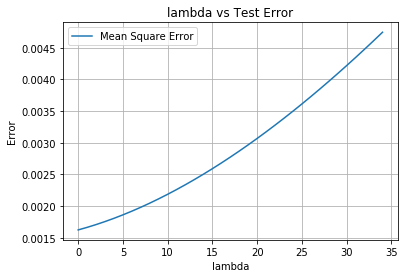

In [23]:
#plotting graphs    
plt.plot(lamba_list,error_list,label="Mean Square Error")
plt.title('lambda vs Test Error')
plt.xlabel('lambda')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

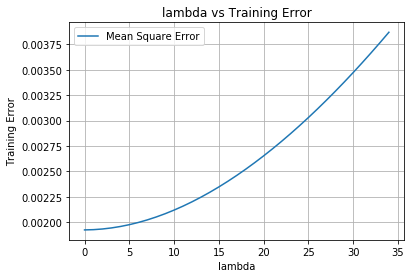

In [24]:
#plotting graphs    
plt.plot(lamba_list,training_error_list,label="Mean Square Error")
plt.title('lambda vs Training Error')
plt.xlabel('lambda')
plt.ylabel('Training Error')
plt.grid(True)
plt.legend()
plt.show()